# Tarea 4. Midiendo rendimiento y riesgo en un portafolio.

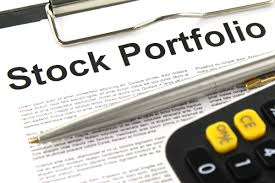

**Resumen.**
> En esta tarea, calcularás medidas de rendimiento esperado diario y volatilidad para cuatro diferentes portafolios. Usarás los históricos de precios que ya descargaste en la tarea anterior.

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea4_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea4_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Descarga de datos (10 puntos)

Descargar los precios diarios ajustados en el cierre para el índice S&P 500 (^GSPC), Microsoft (MSFT), Walgreens (WBA), y Tesla Motors (TSLA) durante el periodo comprendido del primero de enero del 2015 hasta el 31 de diciembre del 2019.

1. Mostrar el DataFrame de los precios diarios (2 puntos).
2. Graficar los precios (3 puntos).
3. Mostrar el DataFrame de los rendimientos porcentuales diarios (2 puntos).
4. Graficar los rendimientos (3 puntos).

In [1]:
import pandas as pd

In [3]:
#Importando librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web

In [5]:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio: (start_date='2010-01-01') y fecha fin: (end_date=today)
    # Descargar DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Sólo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices ascendentemente
    closes.sort_index(inplace=True)
    return closes

In [6]:
names= ['^GSPC','MSFT','WBA','TSLA']
start_date='2015-01-01'

In [7]:
closes=pd.DataFrame(get_adj_closes(tickers=names,start_date=start_date))
closes.head(10)

Symbols,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-02,2058.199951,41.864841,67.541489,219.309998
2015-01-05,2020.579956,41.479866,66.208420,210.089996
2015-01-06,2002.609985,40.871037,66.377274,211.279999
2015-01-07,2025.900024,41.390320,68.074707,210.949997
2015-01-08,2062.139893,42.607944,68.918983,210.619995
2015-01-09,2044.810059,42.249817,67.248215,206.660004
2015-01-12,2028.260010,41.721588,67.274857,202.210007
2015-01-13,2023.030029,41.506714,66.883827,204.250000
2015-01-14,2011.270020,41.148579,66.643883,192.690002


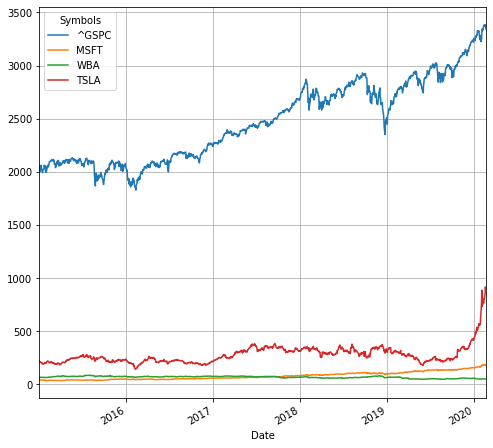

In [8]:
closes.plot(figsize=(8,8),grid=True)

In [9]:
ret=pd.DataFrame(closes.pct_change().dropna())
ret

Symbols,^GSPC,MSFT,WBA,TSLA
Date,,,,
2015-01-05,-0.018278,-0.009196,-0.019737,-0.042041
2015-01-06,-0.008893,-0.014678,0.002550,0.005664
2015-01-07,0.011630,0.012705,0.025573,-0.001562
2015-01-08,0.017888,0.029418,0.012402,-0.001564
2015-01-09,-0.008404,-0.008405,-0.024243,-0.018802
...,...,...,...,...
2020-02-14,0.001844,0.008927,-0.013440,-0.004938
2020-02-18,-0.002920,0.010143,-0.010154,0.072960
2020-02-19,0.004706,0.002999,0.004049,0.068756


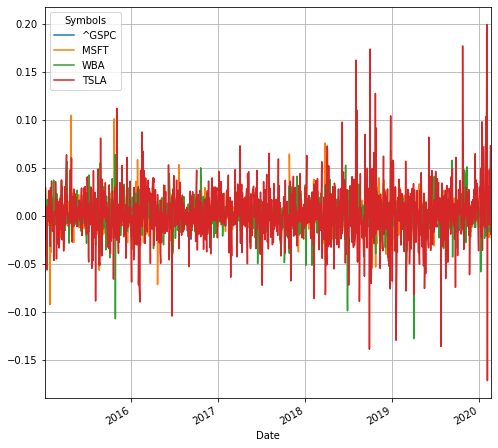

In [10]:
ret.plot(figsize=(8,8), grid=True)

## 2. Rendimiento esperado y volatilidad para cada activo (20 puntos)

Usando los datos de rendimientos diarios de MSFT, WBA, y TSLA:

1. Reportar en un DataFrame el rendimiento esperado diario y la volatilidad diaria para cada activo. Reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada activo (10 puntos).
2. Calcular la matriz de varianza-covarianza (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).
3. Calcular la matriz de correlación (base diaria) para los activos MSFT, WBA, y TSLA (5 puntos).

Para este punto, investigar los métodos `cov` y `corr` de los objetos tipo `pd.DataFrame`.

In [11]:
mean_ret = ret.mean()
mean_ret

Symbols
^GSPC    0.000412
MSFT     0.001238
WBA     -0.000085
TSLA     0.001532
dtype: float64

In [12]:
vol = ret.std()
vol

Symbols
^GSPC    0.008431
MSFT     0.014691
WBA      0.015496
TSLA     0.029766
dtype: float64

In [13]:
ret_summary = pd.DataFrame({'Mean': mean_ret, 'Vol': vol})
ret_summary

,Mean,Vol
Symbols,,
^GSPC,0.000412,0.008431
MSFT,0.001238,0.014691
WBA,-0.000085,0.015496
TSLA,0.001532,0.029766


In [14]:
annual_ret_summary = pd.DataFrame({'Mean': mean_ret * 252,
                                   'Vol': vol * np.sqrt(252)
                                  })
annual_ret_summary

,Mean,Vol
Symbols,,
^GSPC,0.103725,0.133844
MSFT,0.311890,0.233206
WBA,-0.021382,0.245991
TSLA,0.386061,0.472525


## 3. Rentimiento esperado y volatilidad para portafolios (45 puntos)

1. Calcular los rendimientos diarios de los siguientes portafolios. Reportar en un DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior tratando cada portafolio como si fuera un activo individual (20 puntos).
 - Portafolio 1: igualmente ponderado entre MSFT, WBA, y TSLA.
 - Portafolio 2: 30% MSFT, 20% WBA, y 50% TSLA.
 - Portafolio 3: 50% MSFT, 30% WBA, y 20% TSLA.
 - Portafolio 4: 20% MSFT, 50% WBA, y 30% TSLA.
2. Para cada uno de los anteriores portafolios, reportar en otro DataFrame el rendimiento esperado anual y la volatilidad anual para cada portafolio, calculando lo anterior mediante las fórmulas de rendimiento esperado y volatilidad para portafolios derivadas en clase (20 puntos).
3. Comparar los resultados del punto uno con los del punto dos (5 puntos).

In [16]:
ret['Port1']=1/3*ret['MSFT']+1/3*ret['WBA']+1/3*ret['TSLA']
ret['Port2'] = 0.3*ret['MSFT']+0.2*ret['WBA']+0.5*ret['TSLA']
ret['Port3'] = 0.5*ret['MSFT']+0.3*ret['WBA']+0.2*ret['TSLA']
ret['Port4'] = 0.2*ret['MSFT']+0.5*ret['WBA']+0.3*ret['TSLA']
ret

Symbols,^GSPC,MSFT,WBA,TSLA,Port1,Port2,Port3,Port4
Date,,,,,,,,
2015-01-05,-0.018278,-0.009196,-0.019737,-0.042041,-0.023658,-0.027727,-0.018927,-0.024320
2015-01-06,-0.008893,-0.014678,0.002550,0.005664,-0.002154,-0.001061,-0.005441,0.000039
2015-01-07,0.011630,0.012705,0.025573,-0.001562,0.012239,0.008145,0.013712,0.014859
2015-01-08,0.017888,0.029418,0.012402,-0.001564,0.013419,0.010524,0.018117,0.011615
2015-01-09,-0.008404,-0.008405,-0.024243,-0.018802,-0.017150,-0.016771,-0.015236,-0.019443
...,...,...,...,...,...,...,...,...
2020-02-14,0.001844,0.008927,-0.013440,-0.004938,-0.003150,-0.002479,-0.000556,-0.006416
2020-02-18,-0.002920,0.010143,-0.010154,0.072960,0.024316,0.037492,0.016617,0.018839
2020-02-19,0.004706,0.002999,0.004049,0.068756,0.025268,0.036087,0.016466,0.023251


In [18]:
ret.mean()

Symbols
^GSPC    0.000412
MSFT     0.001238
WBA     -0.000085
TSLA     0.001532
Port1    0.000895
Port2    0.001120
Port3    0.000900
Port4    0.000665
dtype: float64

In [19]:
ret.std()

Symbols
^GSPC    0.008431
MSFT     0.014691
WBA      0.015496
TSLA     0.029766
Port1    0.014803
Port2    0.017908
Port3    0.013216
Port4    0.014491
dtype: float64

In [20]:
annual_ret_summary2 = pd.DataFrame(data={'Media': 252*ret.mean(), 
                                 'Volatilidad': np.sqrt(252)*ret.std()}, index=ret.columns)
annual_ret_summary2

,Media,Volatilidad
Symbols,,
^GSPC,0.103725,0.133844
MSFT,0.311890,0.233206
WBA,-0.021382,0.245991
TSLA,0.386061,0.472525
Port1,0.225523,0.234998
Port2,0.282322,0.284283
Port3,0.226743,0.209800
Port4,0.167506,0.230031


## 4. Gráfico de rendimientos esperados vs. volatilidad (25 puntos)

1. Crear un gráfico de puntos que muestre el rendimiento esperado y la volatilidad para cada uno de los activos, el índice S&P500, y los cuatro portafolios en el espacio rendimiento esperado (eje y) contra volatilidad (eje x). Etiquetar cada uno de los puntos y los ejes apropiadamente (15 puntos).
2. ¿Qué puede concluir acerca de la posición en el gráfico de los portafolios respecto a los activos? (10 puntos)

In [21]:
annual_ret_summ = pd.DataFrame(columns=['Media', 'Volatilidad'], index=['Port1', 'Port2','Port3','Port4'])
annual_ret_summ.loc['Port1'] = np.array([0.225523, 0.234998])
annual_ret_summ.loc['Port2'] = np.array([0.282322, 0.284283])
annual_ret_summ.loc['Port3'] = np.array([0.226743, 0.209800])
annual_ret_summ.loc['Port4'] = np.array([0.167506, 0.230031])
annual_ret_summ

,Media,Volatilidad
Port1,0.225523,0.234998
Port2,0.282322,0.284283
Port3,0.226743,0.2098
Port4,0.167506,0.230031


KeyError: 'Port1'

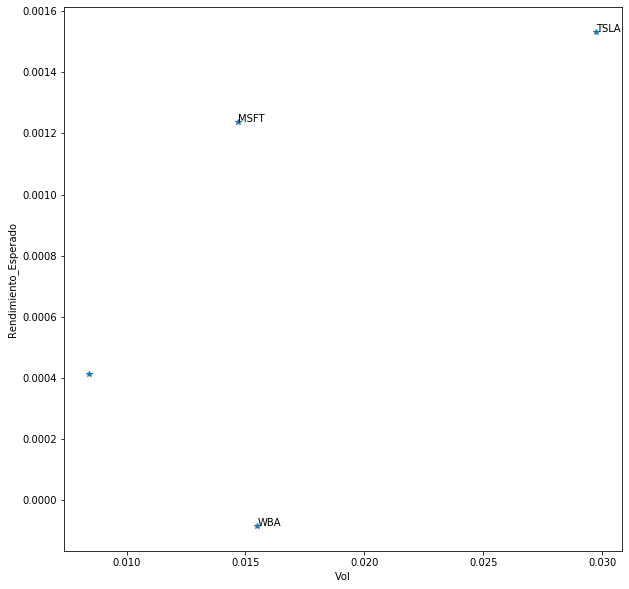

In [29]:
x_points =  ret_summary['Vol']
y_points = ret_summary['Mean']
plt.figure(figsize=(10,10))
plt.plot(x_points, y_points, '*')
plt.xlabel('Vol')
plt.ylabel('Rendimiento_Esperado')
#Etiqueta de cada instrumento
plt.text(ret_summary.loc['MSFT','Vol'],
        ret_summary.loc['MSFT','Mean'], 'MSFT')
plt.text(ret_summary.loc['TSLA','Vol'],
        ret_summary.loc['TSLA','Mean'], 'TSLA')
plt.text(ret_summary.loc['WBA','Vol'],
        ret_summary.loc['WBA','Mean'], 'WBA')
plt.text(ret_summary.loc['Port1','Vol'], 
         ret_summary.loc['Port1','Mean'], 'Port1')
plt.text(ret_summary.loc['Port2','Vol'],
         ret_summary.loc['Port2','Mean'], 'Port2')
plt.text(ret_summary.loc['Port3','Vol'],
         ret_summary.loc['Port3','Mean'], 'Port3')
plt.text(ret_summary.loc['Port4','Vol'],
         ret_summary.loc['Port4','Mean'], 'Port4')

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>